# Previsão de fluxo de clientes em um aeroporto

* **Sobre:** O projeto consiste em uma previsão sobre o fluxo de clientes em um aeroporto fictício, com base nos padrões presentes em uma Série Temporal. Este tipo de planejamento futuro pode ser útil para escolher o momento certo para expansão de um negócio, saber quando a demanda de matéria prima e mão de obra será maior, quando fazer uma promoção ou captação ativa de clientes, e afins.

* **Base de Dados:** Quantidade de passageiros computados em um determinado mês e ano.

* **Referências:** 
  * Estudo desenvolvido acompanhando o curso [Deep Learning: previsão com Keras](https://cursos.alura.com.br/course/deep-learning-previsao-keras), da Alura.

## Abertura do Dataset

In [ ]:
import pandas as pd

In [ ]:
passageiros = pd.read_csv('https://raw.githubusercontent.com/alura-cursos/deeptime/aula1/Passageiros.csv')
passageiros.head()

,tempo,passageiros
0,1949.000000,112
1,1949.083333,118
2,1949.166667,132
3,1949.250000,129
4,1949.333333,121


* A variável tempo foi definida da seguinte forma:
  * Ano: parte inteira
  * Mês: parte decimal, em que cada mês é representado pelo seu ordinal no ano e dividido por 12. (exemplo: setembro = 9/12, ano + 9/12)

* O dataset é uma série temporal.

## Primeiras visualizações

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
sns.set_style("dark")
sns.set_palette(['#59b9df', '#3fc79c', '#c6a3fb', '#e7a567'])

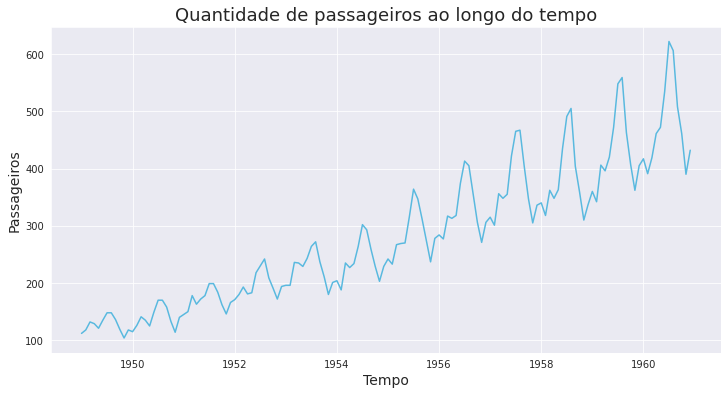

In [ ]:
plt.figure(figsize = (12, 6))

sns.lineplot(data = passageiros, x = 'tempo', y = 'passageiros')

plt.xlabel('Tempo', fontsize = 14)
plt.ylabel('Passageiros', fontsize = 14)
plt.title('Quantidade de passageiros ao longo do tempo', fontsize = 18)
plt.grid(True)

plt.show()

* Há tanto um padrão de crescimento global, quanto um outro padrão que se repete anualmente.

# Pré-processamento dos dados

## Escalonamento

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
sc = StandardScaler()
sc.fit(passageiros)

StandardScaler()

In [ ]:
scaled_data = sc.transform(passageiros)

In [ ]:
X = scaled_data[:,0]
y = scaled_data[:,1]

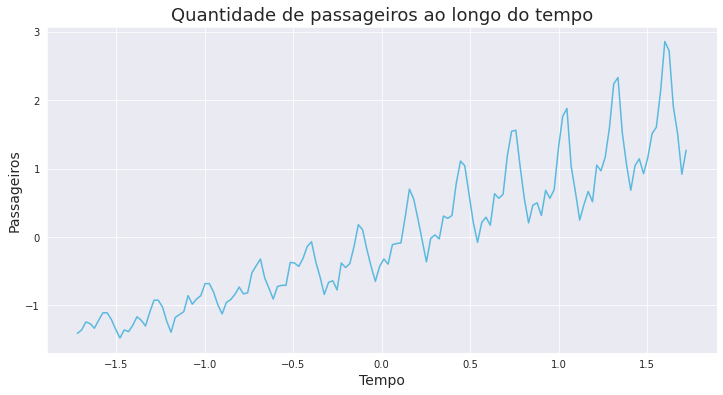

In [ ]:
plt.figure(figsize = (12, 6))

sns.lineplot(x = X, y = y)

plt.xlabel('Tempo', fontsize = 14)
plt.ylabel('Passageiros', fontsize = 14)
plt.title('Quantidade de passageiros ao longo do tempo', fontsize = 18)
plt.grid(True)

plt.show()

* O comportamento permanece o mesmo, mas as escalas foram alteradas.

## Conjuntos de treino e teste

* Os conjuntos foram separados com cortes de arrays para que o conjunto de teste possua os números de passageiros mais recentes, representando o que seria a previsão do modelo.

In [ ]:
train_size = int(len(passageiros) * 0.9)
test_size = len(passageiros) - train_size

X_train = X[0:train_size]
y_train = y[0:train_size]

X_test = X[train_size:len(passageiros)]
y_test = y[train_size:len(passageiros)]

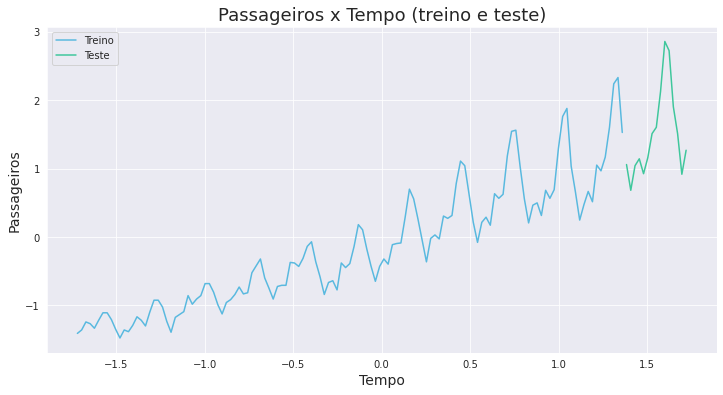

In [ ]:
sns.set_style("dark")
plt.figure(figsize = (12, 6))

sns.lineplot(x = X_train, y = y_train, label = 'Treino')
sns.lineplot(x = X_test, y = y_test, label = 'Teste')

plt.xlabel('Tempo', fontsize = 14)
plt.ylabel('Passageiros', fontsize = 14)
plt.title('Passageiros x Tempo (treino e teste)', fontsize = 18)
plt.grid(True)

plt.show()

# Regressão Linear

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

## Com viés

* Neste primeiro modelo, todos os pesos serão inicializados com 1, com viés, e ativação linear. 

In [ ]:
regressor = Sequential()

regressor.add(Dense(1, input_dim = 1, 
                    kernel_initializer = 'Ones', use_bias = True, 
                    activation = 'linear'))

* **Avaliação de perda: Erro Quadrático Médio (MSE)** 
  * $MSE = \frac{1}{n} \sum_{i=1}^{n} (Y_i - \hat{Y}_i)^2$
  * Calcula o erro através da diferença entre o valor calculado (encontrado pela rede, Y previsto) e o valor real (Y real). 
  * O peso dado aos maiores erros será maior graças à elevação ao quadrado.
  * Essa métrica é bastante sensível a outliers, mas entradas assim não foram idenficiadas no dataset.
  * [Métricas de avaliação para séries temporais](https://www.alura.com.br/artigos/metricas-de-avaliacao-para-series-temporais#:~:text=O%20erro%20quadr%C3%A1tico%20m%C3%A9dio%2C%20MSE,desses%20erros%20quadr%C3%A1ticos%20%C3%A9%20calculada.)

* **Otimizador: Adam**
  * [Dive into Deep Learning](https://pt.d2l.ai/chapter_optimization/adam.html)
  * [Documentação](https://keras.io/api/optimizers/adam/)

In [ ]:
regressor.compile(loss = 'mean_squared_error', optimizer = 'adam')

In [ ]:
regressor.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [ ]:
regressor.fit(X_train, y_train)

5/5 [==============================] - 1s 3ms/step - loss: 0.1285


In [ ]:
y_predict = regressor.predict(X_train)

5/5 [==============================] - 0s 3ms/step


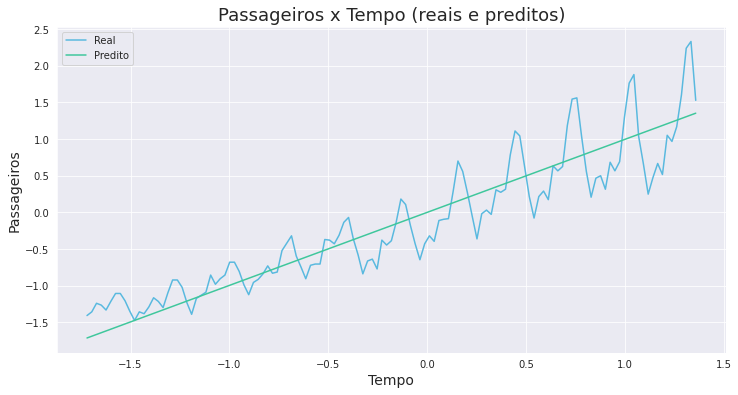

In [ ]:
plt.figure(figsize = (12, 6))

sns.lineplot(x = X_train, y = y_train, label = 'Real')
sns.lineplot(x = X_train, y = y_predict[:,0], label = 'Predito')

plt.xlabel('Tempo', fontsize = 14)
plt.ylabel('Passageiros', fontsize = 14)
plt.title('Passageiros x Tempo (reais e preditos)', fontsize = 18)
plt.grid(True)

plt.show()

## Sem viés

In [ ]:
regressor = Sequential()

regressor.add(Dense(1, input_dim = 1, 
                    kernel_initializer = 'Ones', use_bias = False, 
                    activation = 'linear'))

regressor.compile(loss = 'mean_squared_error', optimizer = 'adam')

regressor.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 1)                 1         
                                                                 
Total params: 1
Trainable params: 1
Non-trainable params: 0
_________________________________________________________________


* A quantidade de parâmetros foi diminuída para 1, já que não tem mais o viés. 

* É desejável diminuir a quantidade de parâmetros sem prejudicar a rede.

In [ ]:
regressor.fit(X_train, y_train)
y_predict = regressor.predict(X_train)

5/5 [==============================] - 0s 2ms/step


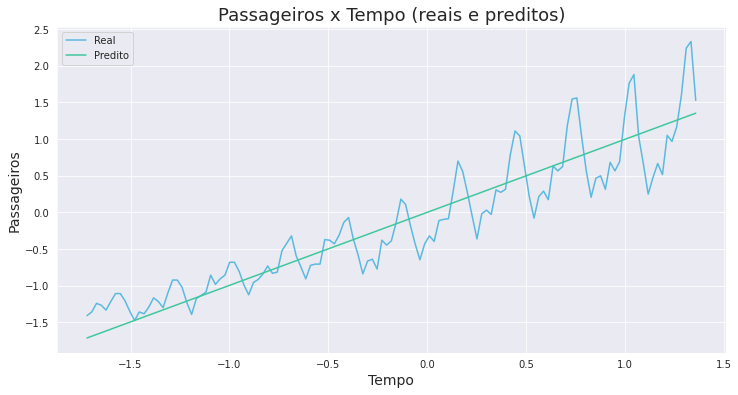

In [ ]:
plt.figure(figsize = (12, 6))

sns.lineplot(x = X_train, y = y_train, label = 'Real')
sns.lineplot(x = X_train, y = y_predict[:,0], label = 'Predito')

plt.xlabel('Tempo', fontsize = 14)
plt.ylabel('Passageiros', fontsize = 14)
plt.title('Passageiros x Tempo (reais e preditos)', fontsize = 18)
plt.grid(True)

plt.show()

* Os resultados foram praticamente os mesmos, então o use_bias permanecerá False.

* O modelo utilizando Regressão Linear gerou uma reta crescente que acompanha o aumento gradativo de clientes do aeroporto, ano após ano.

* Entretanto, apenas com o modelo linear não é possível representar o padrão de picos anuais. É necessário um modelo mais complexo.

# Convertendo o resultado para o número de passageiros

* Devido ao Escalonamento, é necessária uma conversão para números reais de passageiros, com uma Transformação Inversa.

In [ ]:
d = {'tempo' : X_train, 'passageiros' : y_predict[:,0]}
resultados = pd.DataFrame(data = d)
resultados.head()

,tempo,passageiros
0,-1.720064,-1.71243
1,-1.696007,-1.68848
2,-1.671950,-1.66453
3,-1.647894,-1.64058
4,-1.623837,-1.61663


In [ ]:
resultados_transf = pd.DataFrame(sc.inverse_transform(resultados))
resultados_transf.columns = ['tempo', 'passageiros']
resultados_transf.head()

,tempo,passageiros
0,1949.000000,75.579203
1,1949.083333,78.442415
2,1949.166667,81.305626
3,1949.250000,84.168823
4,1949.333333,87.032049


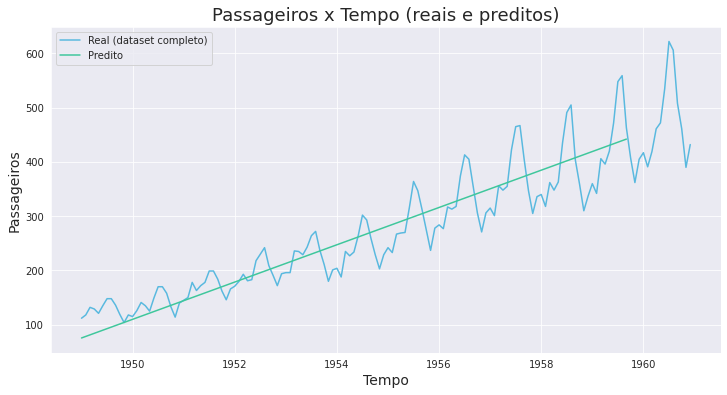

In [ ]:
plt.figure(figsize = (12, 6))

sns.lineplot(data = passageiros, x = 'tempo', y = 'passageiros', label = 'Real (dataset completo)')
sns.lineplot(data = resultados_transf, x = 'tempo', y = 'passageiros', label = 'Predito')

plt.xlabel('Tempo', fontsize = 14)
plt.ylabel('Passageiros', fontsize = 14)
plt.title('Passageiros x Tempo (reais e preditos)', fontsize = 18)
plt.grid(True)

plt.show()

# Predição sobre dados de Teste

In [ ]:
y_predict_test = regressor.predict(X_test)

1/1 [==============================] - 0s 29ms/step


In [ ]:
d = {'tempo' : X_test, 'passageiros' : y_predict_test[:,0]}
test_results = pd.DataFrame(data = d)
test_results.head()

,tempo,passageiros
0,1.383268,1.377129
1,1.407325,1.401079
2,1.431382,1.425029
3,1.455439,1.448979
4,1.479496,1.472930


In [ ]:
test_results_transf = pd.DataFrame(sc.inverse_transform(test_results))
test_results_transf.columns = ['tempo', 'passageiros']
test_results_transf.head()

,tempo,passageiros
0,1959.750000,444.933101
1,1959.833333,447.796312
2,1959.916667,450.659510
3,1960.000000,453.522721
4,1960.083333,456.385933


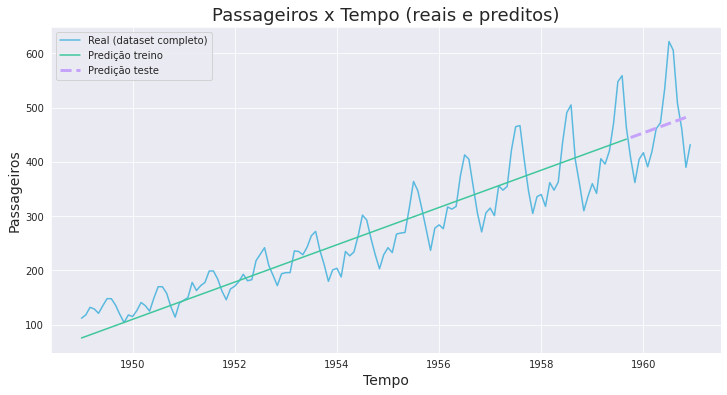

In [ ]:
plt.figure(figsize = (12, 6))

sns.lineplot(data = passageiros, x = 'tempo', y = 'passageiros', label = 'Real (dataset completo)')
sns.lineplot(data = resultados_transf, x = 'tempo', y = 'passageiros', label = 'Predição treino')
sns.lineplot(data = test_results_transf, x = 'tempo', y = 'passageiros', label = 'Predição teste', lw = 3, ls = '--')

plt.xlabel('Tempo', fontsize = 14)
plt.ylabel('Passageiros', fontsize = 14)
plt.title('Passageiros x Tempo (reais e preditos)', fontsize = 18)
plt.grid(True)

plt.show()

In [ ]:
test_loss = regressor.evaluate(X_test, y_test)

1/1 [==============================] - 0s 105ms/step - loss: 0.3533


# Modelo 2: Adicionando camadas escondidas

## Ativação linear

* A camada irá receber apenas um valor, a data, e terá 8 neurônios.
* A inicialização dos pesos será aleatória com distribuição uniforme.
* Função de ativação linear.
* Viéses desativados.

In [ ]:
regressor2 = Sequential()

regressor2.add( # camada de entrada
    Dense(8, input_dim = 1, kernel_initializer = 'random_uniform',
          activation = 'linear', use_bias = False)
)

regressor2.add( # camada escondida
    Dense(8, kernel_initializer = 'random_uniform',
          activation = 'linear', use_bias = False)
)

regressor2.add( # camada de saída
    Dense(1, kernel_initializer = 'random_uniform',
          activation = 'linear', use_bias = False)
)

regressor2.compile(loss = 'mean_squared_error', optimizer = 'adam')

In [ ]:
regressor2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 8)                 8         
                                                                 
 dense_3 (Dense)             (None, 8)                 64        
                                                                 
 dense_4 (Dense)             (None, 1)                 8         
                                                                 
Total params: 80
Trainable params: 80
Non-trainable params: 0
_________________________________________________________________


* O valor de épocas foi aumentando para 200, o padrão é 5.

In [ ]:
regressor2.fit(X_train, y_train, epochs = 200, verbose = 0)

### Predições

In [ ]:
y_predict = regressor2.predict(X_train)
y_predict_test = regressor2.predict(X_test)

1/1 [==============================] - 0s 25ms/step


#### Tranformação do teste

In [ ]:
d = {'tempo' : X_test, 'passageiros' : y_predict_test[:,0]}
test_results = pd.DataFrame(data = d)

test_results_transf = pd.DataFrame(sc.inverse_transform(test_results))
test_results_transf.columns = ['tempo', 'passageiros']
test_results_transf.head()

,tempo,passageiros
0,1959.750000,426.511826
1,1959.833333,429.054667
2,1959.916667,431.597494
3,1960.000000,434.140335
4,1960.083333,436.683176


#### Transformação do treino

In [ ]:
d = {'tempo' : X_train, 'passageiros' : y_predict[:,0]}
train_results = pd.DataFrame(data = d)

train_results_transf = pd.DataFrame(sc.inverse_transform(train_results))
train_results_transf.columns = ['tempo', 'passageiros']
train_results_transf.head()

,tempo,passageiros
0,1949.000000,98.485650
1,1949.083333,101.028491
2,1949.166667,103.571332
3,1949.250000,106.114159
4,1949.333333,108.657029


## Gráfico

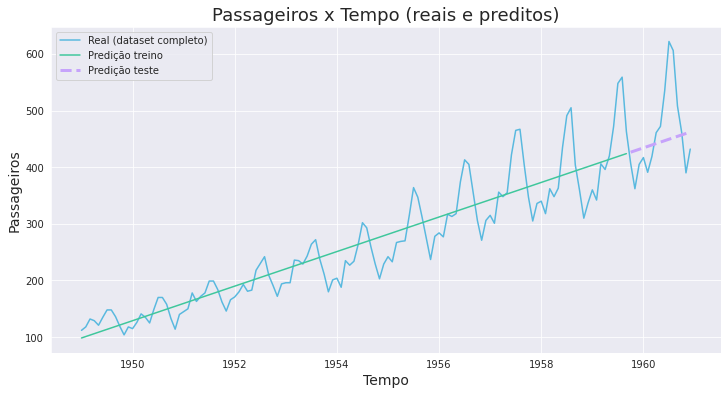

In [ ]:
plt.figure(figsize = (12, 6))

sns.lineplot(data = passageiros, x = 'tempo', y = 'passageiros', label = 'Real (dataset completo)')
sns.lineplot(data = train_results_transf, x = 'tempo', y = 'passageiros', label = 'Predição treino')
sns.lineplot(data = test_results_transf, x = 'tempo', y = 'passageiros', label = 'Predição teste', lw = 3, ls = '--')

plt.xlabel('Tempo', fontsize = 14)
plt.ylabel('Passageiros', fontsize = 14)
plt.title('Passageiros x Tempo (reais e preditos)', fontsize = 18)
plt.grid(True)

plt.show()

In [ ]:
test_loss = regressor2.evaluate(X_test, y_test)

1/1 [==============================] - 0s 93ms/step - loss: 0.3705


## Ativação não-linear: Sigmoid

In [ ]:
regressor2 = Sequential()

regressor2.add( # camada de entrada
    Dense(8, input_dim = 1, kernel_initializer = 'random_uniform',
          activation = 'sigmoid', use_bias = False)
)

regressor2.add( # camada escondida
    Dense(8, kernel_initializer = 'random_uniform',
          activation = 'sigmoid', use_bias = False)
)

regressor2.add( # camada de saída
    Dense(1, kernel_initializer = 'random_uniform',
          activation = 'linear', use_bias = False)
)

regressor2.compile(loss = 'mean_squared_error', optimizer = 'adam')

In [ ]:
regressor2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 8)                 8         
                                                                 
 dense_6 (Dense)             (None, 8)                 64        
                                                                 
 dense_7 (Dense)             (None, 1)                 8         
                                                                 
Total params: 80
Trainable params: 80
Non-trainable params: 0
_________________________________________________________________


* A estrutura da rede não mudou, apenas a função de ativação.

* A seguir, o modelo será treinado por 500 épocas.

In [ ]:
regressor2.fit(X_train, y_train, epochs = 500, verbose = 0)

### Predições

In [ ]:
y_predict = regressor2.predict(X_train)
y_predict_test = regressor2.predict(X_test)

1/1 [==============================] - 0s 19ms/step


#### Transformações

In [ ]:
d = {'tempo' : X_test, 'passageiros' : y_predict_test[:,0]}
test_results = pd.DataFrame(data = d)

test_results_transf = pd.DataFrame(sc.inverse_transform(test_results))
test_results_transf.columns = ['tempo', 'passageiros']
test_results_transf.head()

,tempo,passageiros
0,1959.750000,409.828476
1,1959.833333,410.468219
2,1959.916667,411.077408
3,1960.000000,411.657481
4,1960.083333,412.209806


In [ ]:
d = {'tempo' : X_train, 'passageiros' : y_predict[:,0]}
train_results = pd.DataFrame(data = d)

train_results_transf = pd.DataFrame(sc.inverse_transform(train_results))
train_results_transf.columns = ['tempo', 'passageiros']
train_results_transf.head()

,tempo,passageiros
0,1949.000000,156.042746
1,1949.083333,156.208432
2,1949.166667,156.382712
3,1949.250000,156.566055
4,1949.333333,156.758933


## Gráfico

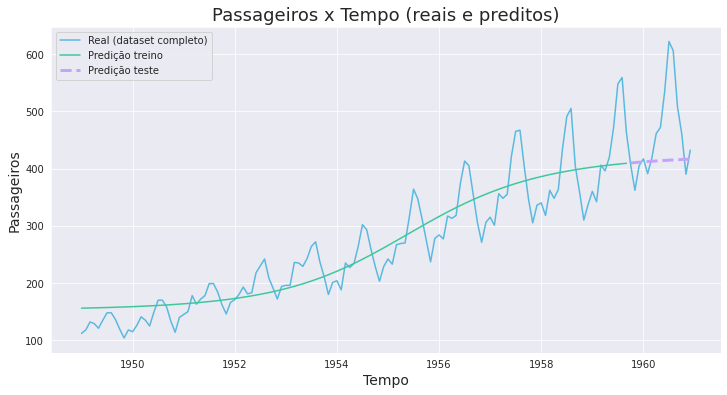

In [ ]:
plt.figure(figsize = (12, 6))

sns.lineplot(data = passageiros, x = 'tempo', y = 'passageiros', label = 'Real (dataset completo)')
sns.lineplot(data = train_results_transf, x = 'tempo', y = 'passageiros', label = 'Predição treino')
sns.lineplot(data = test_results_transf, x = 'tempo', y = 'passageiros', label = 'Predição teste', lw = 3, ls = '--')

plt.xlabel('Tempo', fontsize = 14)
plt.ylabel('Passageiros', fontsize = 14)
plt.title('Passageiros x Tempo (reais e preditos)', fontsize = 18)
plt.grid(True)

plt.show()

In [ ]:
test_loss = regressor2.evaluate(X_test, y_test)

1/1 [==============================] - 0s 91ms/step - loss: 0.5328


* Apesar do modelo estar se tornando mais complexo, a perda está aumentando.

# Reestruturação dos dados de entrada

* As quantidades de passageiros encontradas como saída de uma iteração serão utilizada como entrada da próxima iteração.

* Sendo assim, haverá um novo vetor X (para treino e teste) com atraso de uma posição em relação ao y.

* O vetor y, de saída, perderá o seu primeiro elemento.

In [ ]:
import numpy as np

In [ ]:
def separa_dados(vetor, n_passos):
  X_novo, y_novo = [], []

  for i in range(n_passos, vetor.shape[0]):
    X_novo.append(list(vetor.loc[i - n_passos : i-1]))
    y_novo.append(vetor.loc[i])

  X_novo, y_novo = np.array(X_novo), np.array(y_novo)

  return X_novo, y_novo

In [ ]:
vetor = pd.DataFrame(y_train)[0]
vetor2 = pd.DataFrame(y_test)[0]

X_train_new, y_train_new = separa_dados(vetor, 1)
X_test_new, y_test_new = separa_dados(vetor2, 1)

# Modelo 3: Entrada alterada

## Separação de dados com passo 1

* O modelo será treinado somente com os números de passageiros.

In [ ]:
regressor3 = Sequential()

regressor3.add(
    Dense(8, input_dim = 1, kernel_initializer = 'ones',
          activation = 'linear', use_bias = False)
)

regressor3.add(
    Dense(64, kernel_initializer = 'random_uniform',
          activation = 'sigmoid', use_bias = False)
)

regressor3.add(
    Dense(1, kernel_initializer = 'random_uniform',
          activation = 'linear', use_bias = False)
)
regressor3.compile(loss = 'mean_squared_error', optimizer = 'adam')

In [ ]:
regressor3.fit(X_train_new, y_train_new, epochs = 100, verbose = 0)

In [ ]:
y_predict_new = regressor3.predict(X_train_new)
y_predict_test_new = regressor3.predict(X_test_new)

1/1 [==============================] - 0s 42ms/step


### Gráfico

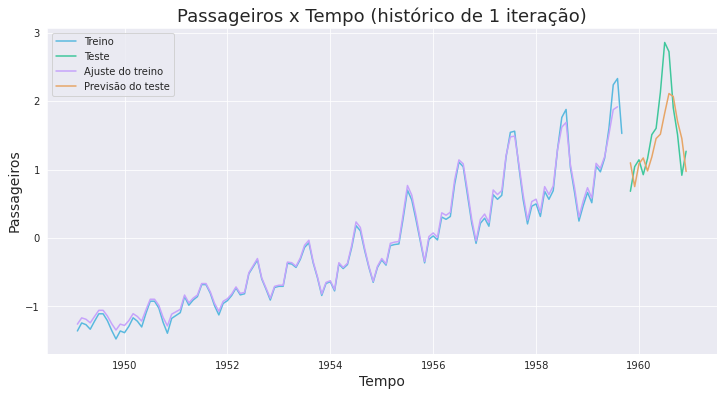

In [ ]:
plt.figure(figsize = (12, 6))

sns.lineplot(data = passageiros[1:129], x = 'tempo', y = y_train_new, label = 'Treino')
sns.lineplot(data = passageiros[130:], x = 'tempo', y = y_test_new, label = 'Teste')
sns.lineplot(data = passageiros[1:129], x = 'tempo', y = pd.DataFrame(y_predict_new)[0], label = 'Ajuste do treino')
sns.lineplot(data = passageiros[130:], x = 'tempo', y = pd.DataFrame(y_predict_test_new)[0].values, label = 'Previsão do teste')

plt.xlabel('Tempo', fontsize = 14)
plt.ylabel('Passageiros', fontsize = 14)
plt.title('Passageiros x Tempo (histórico de 1 iteração)', fontsize = 18)
plt.grid(True)

plt.show()

In [ ]:
test_loss = regressor3.evaluate(X_test_new, y_test_new)

1/1 [==============================] - 0s 88ms/step - loss: 0.1958


# Modelo 4: Separação de dados com passo 4

* Desta forma, 4 valores anteriores serão usados pasa estimar o valor de saída.

In [ ]:
X_train_new, y_train_new = separa_dados(vetor, 4)
X_test_new, y_test_new = separa_dados(vetor2, 4)

In [ ]:
X_train_new[0:5]

array([[-1.40777884, -1.35759023, -1.24048348, -1.26557778],
       [-1.35759023, -1.24048348, -1.26557778, -1.33249593],
       [-1.24048348, -1.26557778, -1.33249593, -1.21538918],
       [-1.26557778, -1.33249593, -1.21538918, -1.10664719],
       [-1.33249593, -1.21538918, -1.10664719, -1.10664719]])

In [ ]:
y_train_new[0:5]

array([-1.33249593, -1.21538918, -1.10664719, -1.10664719, -1.20702441])

* O **input_dim** passa a ser 4 porque são passados 4 valores de entrada, que é o históricos de 4 iterações anteriores da quantidade de passageiros.

* **epochs** foi aumentando para 300.

In [ ]:
regressor4 = Sequential()

regressor4.add(
    Dense(8, input_dim = 4, kernel_initializer = 'ones',
          activation = 'linear', use_bias = False)
)

regressor4.add(
    Dense(64, kernel_initializer = 'random_uniform',
          activation = 'sigmoid', use_bias = False)
)

regressor4.add(
    Dense(1, kernel_initializer = 'random_uniform',
          activation = 'linear', use_bias = False)
)
regressor4.compile(loss = 'mean_squared_error', optimizer = 'adam')

In [ ]:
regressor4.fit(X_train_new, y_train_new, epochs = 300, verbose = 0)

In [ ]:
y_predict_new = regressor4.predict(X_train_new)
y_predict_test_new = regressor4.predict(X_test_new)

1/1 [==============================] - 0s 19ms/step


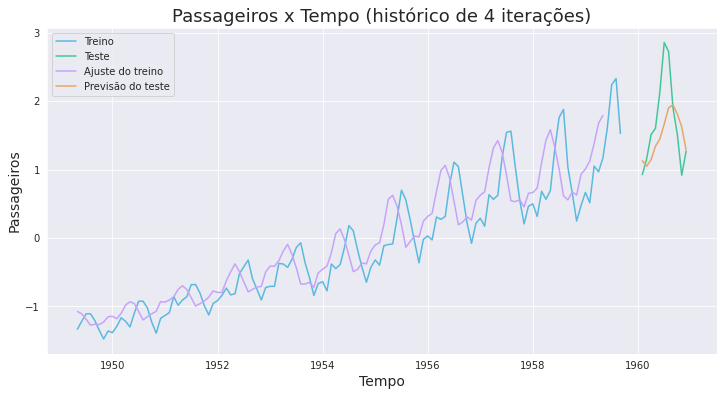

In [ ]:
plt.figure(figsize = (12, 6))

sns.lineplot(data = passageiros[4:129], x = 'tempo', y = y_train_new, label = 'Treino')
sns.lineplot(data = passageiros[133:], x = 'tempo', y = y_test_new, label = 'Teste')
sns.lineplot(data = passageiros[4:129], x = 'tempo', y = pd.DataFrame(y_predict_new)[0], label = 'Ajuste do treino')
sns.lineplot(data = passageiros[133:], x = 'tempo', y = pd.DataFrame(y_predict_test_new)[0].values, label = 'Previsão do teste')

plt.xlabel('Tempo', fontsize = 14)
plt.ylabel('Passageiros', fontsize = 14)
plt.title('Passageiros x Tempo (histórico de 4 iterações)', fontsize = 18)
plt.grid(True)

plt.show()

In [ ]:
test_loss = regressor4.evaluate(X_test_new, y_test_new)

1/1 [==============================] - 0s 40ms/step - loss: 0.3103
